# Exercise Chapter 4 
Modern Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (September 15, 2022) <br>
ISBN-13: 978-3031075650

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

In [1]:
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import random
import numpy as np
import pandas as pd
import pingouin as pg
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as sms
import seaborn as sns
import matplotlib.pyplot as plt

import mistat

# Exercise 1

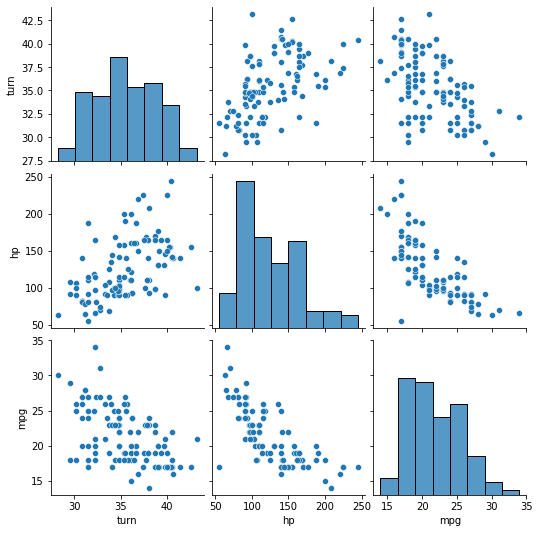

In [3]:
car = mistat.load_data('CAR')
sns.pairplot(car[['turn', 'hp', 'mpg']])
plt.show()

# Exercise 2

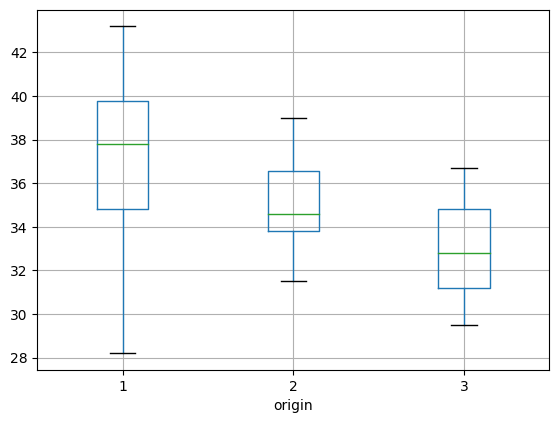

In [4]:
car = mistat.load_data('CAR')

ax = car.boxplot(column='turn', by='origin')
ax.set_title('')
ax.get_figure().suptitle('')
ax.set_xlabel('origin')
plt.show()

# Exercise 3

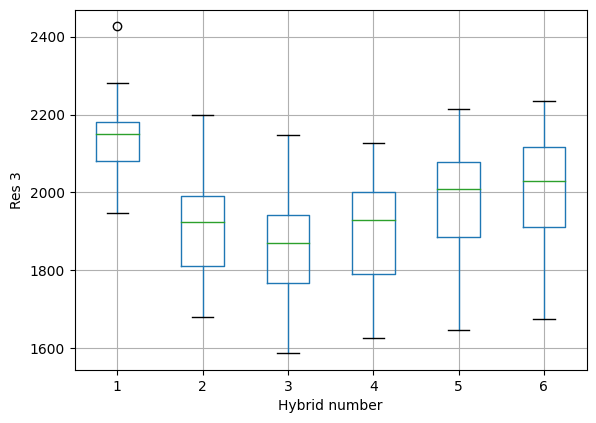

In [5]:
hadpas = mistat.load_data('HADPAS')
ax = hadpas.boxplot(column='res3', by='hyb')
ax.set_title('')
ax.get_figure().suptitle('')
ax.set_xlabel('Hybrid number')
ax.set_ylabel('Res 3')
plt.show()

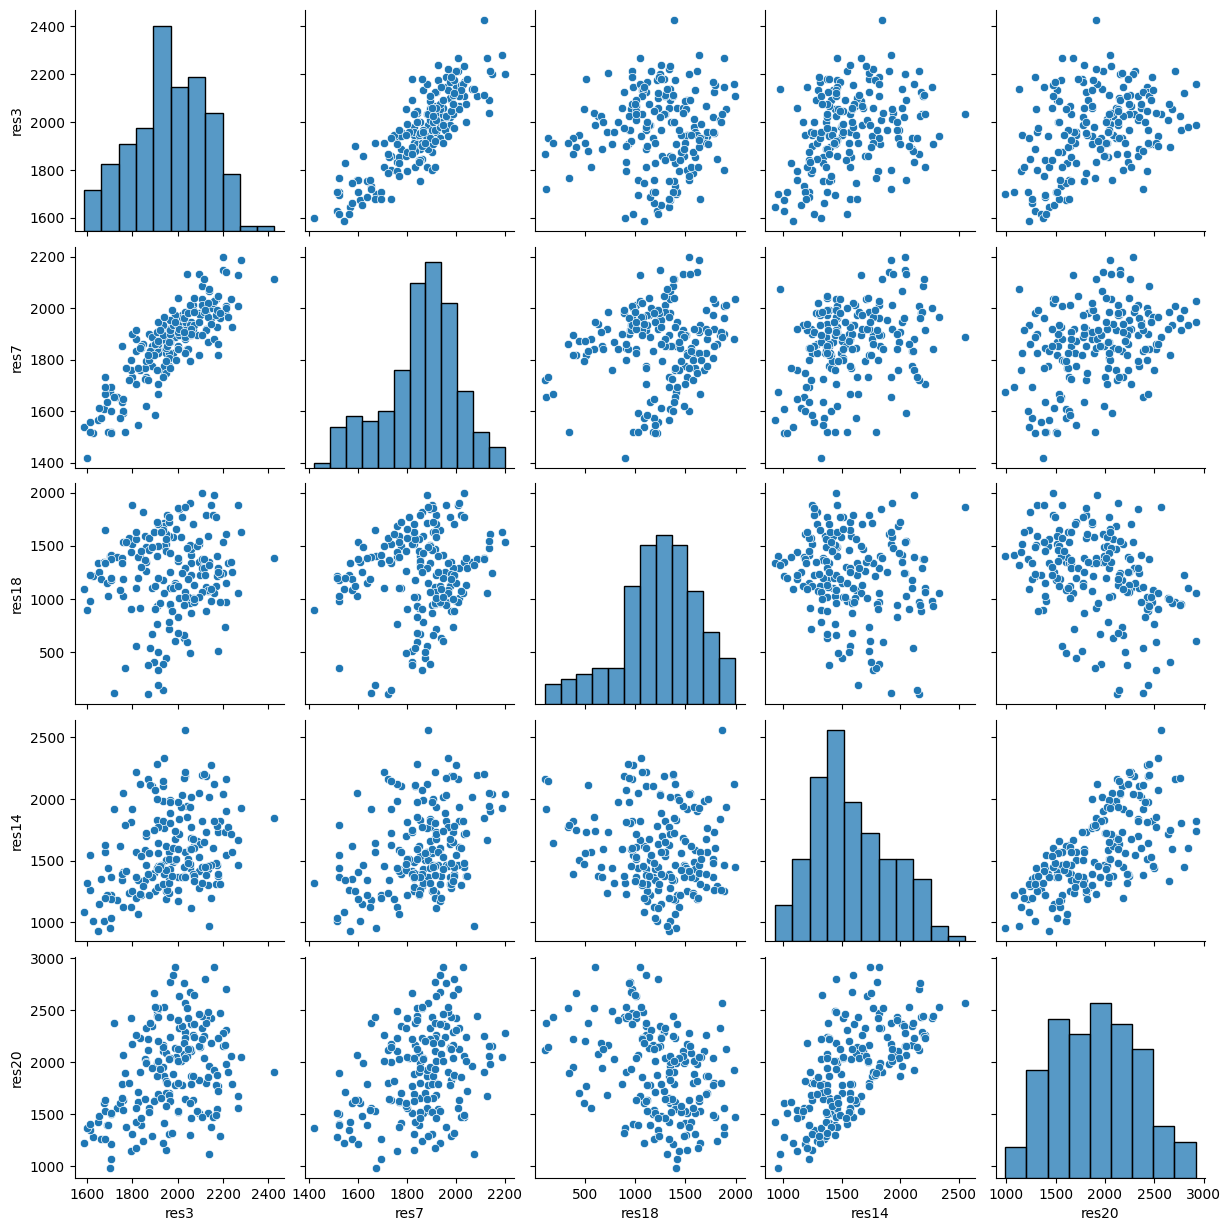

In [6]:
sns.pairplot(hadpas[['res3', 'res7', 'res18', 'res14', 'res20']])
plt.show()

# Exercise 4

In [7]:
car = mistat.load_data('CAR')
binned_car = pd.DataFrame({
  'hp': pd.cut(car['hp'], bins=np.arange(50, 275, 25)),
  'mpg': pd.cut(car['mpg'], bins=np.arange(10, 40, 5)),
})
freqDist = pd.crosstab(binned_car['hp'], binned_car['mpg'])
print(freqDist)
# You can get distributions for hp and mpg by summing along an axis
print(freqDist.sum(axis=0))
print(freqDist.sum(axis=1))

mpg         (10, 15]  (15, 20]  (20, 25]  (25, 30]  (30, 35]
hp                                                          
(50, 75]           0         1         0         4         2
(75, 100]          0         0        23        11         0
(100, 125]         0        10        11         1         0
(125, 150]         0        14         3         1         0
(150, 175]         0        17         0         0         0
(175, 200]         1         5         0         0         0
(200, 225]         1         3         0         0         0
(225, 250]         0         1         0         0         0
mpg
(10, 15]     2
(15, 20]    51
(20, 25]    37
(25, 30]    17
(30, 35]     2
dtype: int64
hp
(50, 75]       7
(75, 100]     34
(100, 125]    22
(125, 150]    18
(150, 175]    17
(175, 200]     6
(200, 225]     4
(225, 250]     1
dtype: int64


# Exercise 5

In [8]:
hadpas = mistat.load_data('HADPAS')
binned_hadpas = pd.DataFrame({
  'res3': pd.cut(hadpas['res3'], bins=np.arange(1580, 2780, 200)),
  'res14': pd.cut(hadpas['res14'], bins=np.arange(900, 3000, 300)),
})
pd.crosstab(binned_hadpas['res14'], binned_hadpas['res3'])

res3,"(1580, 1780]","(1780, 1980]","(1980, 2180]","(2180, 2380]","(2380, 2580]"
res14,,,,,
"(900, 1200]",11,3,3,0,0
"(1200, 1500]",11,33,28,2,0
"(1500, 1800]",5,16,24,6,0
"(1800, 2100]",2,11,12,5,1
"(2100, 2400]",0,9,8,1,0
"(2400, 2700]",0,0,1,0,0


# Exercise 6

In [9]:
hadpas = mistat.load_data('HADPAS')
in_range = hadpas[hadpas['res14'].between(1300, 1500)]
pd.cut(in_range['res3'], bins=np.arange(1580, 2780, 200)).value_counts(sort=False)

(1580, 1780]     8
(1780, 1980]    21
(1980, 2180]    25
(2180, 2380]     2
(2380, 2580]     0
Name: res3, dtype: int64

# Exercise 7

In [10]:
hadpas = mistat.load_data('HADPAS')
bins = [900, 1200, 1500, 1800, 2100, 3000]
binned_res14 = pd.cut(hadpas['res14'], bins=bins)

results = []
for group, df in hadpas.groupby(binned_res14):
  res3 = df['res3']
  results.append({
    'res3': group,
    'N': len(res3),
    'mean': res3.mean(),
    'std': res3.std(),
  })
pd.DataFrame(results)

,res3,N,mean,std
0,"(900, 1200]",17,1779.117647,162.348730
1,"(1200, 1500]",74,1952.175676,154.728251
2,"(1500, 1800]",51,1997.196078,151.608841
3,"(1800, 2100]",31,2024.774194,156.749845
4,"(2100, 3000]",19,1999.736842,121.505758


# Exercise 8

In [11]:
df = pd.DataFrame([
  [10.0, 8.04, 10.0, 9.14, 10.0, 7.46, 8.0, 6.58],
  [8.0, 6.95, 8.0, 8.14, 8.0, 6.77, 8.0, 5.76],
  [13.0, 7.58, 13.0, 8.74, 13.0, 12.74, 8.0, 7.71],
  [9.0, 8.81, 9.0, 8.77, 9.0, 7.11, 8.0, 8.84],
  [11.0, 8.33, 11.0, 9.26, 11.0, 7.81, 8.0, 8.47],
  [14.0, 9.96, 14.0, 8.10, 14.0, 8.84, 8.0, 7.04],
  [6.0, 7.24, 6.0, 6.13, 6.0, 6.08, 8.0, 5.25],
  [4.0, 4.26, 4.0, 3.10, 4.0, 5.39, 19.0, 12.50],
  [12.0, 10.84, 12.0, 9.13, 12.0, 8.15, 8.0, 5.56],
  [7.0, 4.82, 7.0, 7.26, 7.0, 6.42, 8.0, 7.91],
  [5.0, 5.68, 5.0, 4.74, 5.0, 5.73, 8.0, 6.89],
], columns=['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4'])

results = []
for i in (1, 2, 3, 4):
  x = df[f'x{i}']
  y = df[f'y{i}']
  model = smf.ols(formula=f'y{i} ~ 1 + x{i}', data=df).fit()
  results.append({
    'Data Set': i,
    'Intercept': model.params['Intercept'],
    'Slope': model.params[f'x{i}'],
    'R2': model.rsquared,
  })
pd.DataFrame(results)

,Data Set,Intercept,Slope,R2
0,1,3.000091,0.500091,0.666542
1,2,3.000909,0.500000,0.666242
2,3,3.002455,0.499727,0.666324
3,4,3.001727,0.499909,0.666707


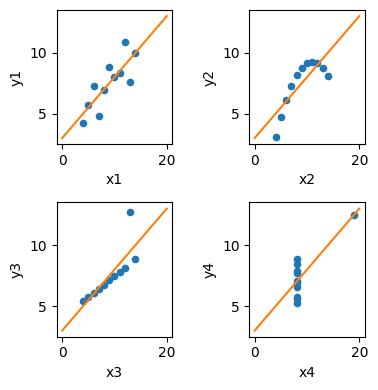

In [12]:
fig, axes = plt.subplots(figsize=[4, 4], ncols=2, nrows=2)
for i in range(4):
  ax = axes[i // 2, i % 2]
  df.plot.scatter(x=f'x{i+1}', y=f'y{i + 1}', ax=ax)
  ax.plot([0, 20], [3, 13], color='C1')
plt.tight_layout()
plt.show()

# Exercise 9

In [13]:
car = mistat.load_data('CAR')
car[['turn', 'hp', 'mpg']].corr()

,turn,hp,mpg
turn,1.000000,0.507610,-0.541061
hp,0.507610,1.000000,-0.754716
mpg,-0.541061,-0.754716,1.000000


# Exercise 11

In [14]:
car = mistat.load_data('CAR')

model = smf.ols(formula='mpg ~ 1 + hp + turn', data=car).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.596   
Dependent Variable: mpg              AIC:                511.2247
Date:               2022-07-11 13:44 BIC:                519.2988
No. Observations:   109              Log-Likelihood:     -252.61 
Df Model:           2                F-statistic:        80.57   
Df Residuals:       106              Prob (F-statistic): 5.29e-22
R-squared:          0.603            Scale:              6.2035  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     38.2642    2.6541  14.4167  0.0000  33.0020  43.5263
hp            -0.0631    0.0069  -9.1070  0.0000  -0.0768  -0.0493
turn          -0.2510    0.0838  -2.9965  0.0034  -0.4171  -0.0849
-----------------------------------------------------------------
Omnibus:             

# Exercise 12

In [15]:
car = mistat.load_data('CAR')

# y: mpg, x1: cyl, x2: hp
model_1 = smf.ols(formula='mpg ~ cyl + 1', data=car).fit()
e_1 = model_1.resid

model_2 = smf.ols(formula='hp ~ cyl + 1', data=car).fit()
e_2 = model_2.resid

print(f'Partial correlation {stats.pearsonr(e_1, e_2)[0]:.5f}')

Partial correlation -0.70378


# Exercise 13

In [16]:
car = mistat.load_data('CAR')

# y: mpg, x1: hp, x2: turn
model_1 = smf.ols(formula='mpg ~ hp + 1', data=car).fit()
e_1 = model_1.resid
print('Model mpg ~ hp + 1:\n', model_1.params)

model_2 = smf.ols(formula='turn ~ hp + 1', data=car).fit()
e_2 = model_2.resid
print('Model turn ~ hp + 1:\n', model_2.params)

print('Partial correlation', stats.pearsonr(e_1, e_2)[0])
df = pd.DataFrame({'e1': e_1, 'e2': e_2})
model_partial = smf.ols(formula='e1 ~ e2 - 1', data=df).fit()
# print(model_partial.summary2())
print('Model e1 ~ e2:\n', model_partial.params)

Model mpg ~ hp + 1:
 Intercept    30.663308
hp           -0.073611
dtype: float64
Model turn ~ hp + 1:
 Intercept    30.281255
hp            0.041971
dtype: float64
Partial correlation -0.27945246615045016
Model e1 ~ e2:
 e2   -0.251008
dtype: float64


# Exercise 15

In [17]:
almpin = mistat.load_data('ALMPIN')
model = smf.ols('capDiam ~ 1 + diam2 + diam3', data=almpin).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.842     
Dependent Variable: capDiam          AIC:                -482.1542 
Date:               2022-07-11 13:44 BIC:                -475.4087 
No. Observations:   70               Log-Likelihood:     244.08    
Df Model:           2                F-statistic:        184.2     
Df Residuals:       67               Prob (F-statistic): 5.89e-28  
R-squared:          0.846            Scale:              5.7272e-05
---------------------------------------------------------------------
                Coef.    Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept       4.7565     0.5501   8.6467   0.0000   3.6585   5.8544
diam2           0.5040     0.1607   3.1359   0.0025   0.1832   0.8248
diam3           0.5203     0.1744   2.9830   0.0040   0.1722   0.8684
-------------------------------------------------------------------
Omnibus:               1.078         Durbin-Watson:           2.350
Prob(Omnibus):         0.583         Jarque-Bera (JB):        0.976
Skew:                  -0.071        Prob(JB):                0.614
Kurtosis:              2.439         Condition No.:           8689 
===================================================================
* The condition number is large (9e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

# Exercise 16

In [18]:
gasol = mistat.load_data('GASOL')
# rename column 'yield' to 'Yield' as 'yield' is a special keyword in Python
gasol = gasol.rename(columns={'yield': 'Yield'})
model = smf.ols(formula='Yield ~ x1 + x2 + astm + endPt',
                data=gasol).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.957   
Dependent Variable: Yield            AIC:                146.8308
Date:               2022-07-11 13:44 BIC:                154.1595
No. Observations:   32               Log-Likelihood:     -68.415 
Df Model:           4                F-statistic:        171.7   
Df Residuals:       27               Prob (F-statistic): 8.82e-19
R-squared:          0.962            Scale:              4.9927  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    -6.8208   10.1232  -0.6738  0.5062  -27.5918  13.9502
x1            0.2272    0.0999   2.2739  0.0311    0.0222   0.4323
x2            0.5537    0.3698   1.4976  0.1458   -0.2049   1.3124
astm         -0.1495    0.0292  -5.1160  0.0000   -0.2095  -0.0896
endPt         0.1547

In [19]:
model = smf.ols(formula='Yield ~ x1 + astm + endPt', data=gasol).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.955   
Dependent Variable: Yield            AIC:                147.3842
Date:               2022-07-11 13:44 BIC:                153.2471
No. Observations:   32               Log-Likelihood:     -69.692 
Df Model:           3                F-statistic:        218.5   
Df Residuals:       28               Prob (F-statistic): 1.59e-19
R-squared:          0.959            Scale:              5.2143  
------------------------------------------------------------------
             Coef.   Std.Err.     t      P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    4.0320    7.2233    0.5582  0.5811  -10.7643  18.8284
x1           0.2217    0.1021    2.1725  0.0384    0.0127   0.4308
astm        -0.1866    0.0159  -11.7177  0.0000   -0.2192  -0.1540
endPt        0.1565    0.0065   24.2238  0.0000    0.1433   0.1698
--------------------

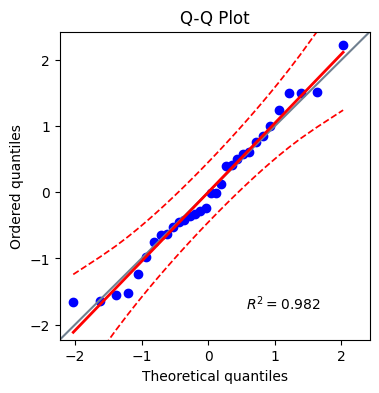

In [20]:
fig, ax = plt.subplots(figsize=[4, 4])
pg.qqplot(model.resid, ax=ax)
plt.show()

# Exercise 23

In [21]:
socell = mistat.load_data('SOCELL')

# combine the two datasets and add the additional columns z and w
socell_1 = socell[['t3', 't1']].copy()
socell_1.columns = ['t3', 't']
socell_1['z'] = 0
socell_2 = socell[['t3', 't2']].copy()
socell_2.columns = ['t3', 't']
socell_2['z'] = 1
combined = pd.concat([socell_1, socell_2])
combined['w'] = combined['z'] * combined['t']

# multiple linear regression model
model_test  = smf.ols(formula='t3 ~ t + z + w + 1',
                      data=combined).fit()
print(model_test.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.952    
Dependent Variable: t3               AIC:                -58.2308 
Date:               2022-07-11 13:44 BIC:                -52.3678 
No. Observations:   32               Log-Likelihood:     33.115   
Df Model:           3                F-statistic:        205.8    
Df Residuals:       28               Prob (F-statistic): 3.55e-19 
R-squared:          0.957            Scale:              0.0084460
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept    0.5187     0.2144    2.4196   0.0223    0.0796   0.9578
t            0.9411     0.0539   17.4664   0.0000    0.8307   1.0515
z           -0.5052     0.3220   -1.5688   0.1279   -1.1648   0.1545
w            0.0633     0.0783    0.8081   0.4259   -0.0971   0.2237

In [22]:
model_combined  = smf.ols(formula='t3 ~ t + 1',
                          data=combined).fit()
print(model_combined.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.870   
Dependent Variable: t3               AIC:                -28.1379
Date:               2022-07-11 13:44 BIC:                -25.2064
No. Observations:   32               Log-Likelihood:     16.069  
Df Model:           1                F-statistic:        208.3   
Df Residuals:       30               Prob (F-statistic): 4.86e-15
R-squared:          0.874            Scale:              0.022876
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    0.6151     0.2527    2.4343   0.0211   0.0990   1.1311
t            0.8882     0.0615   14.4327   0.0000   0.7625   1.0139
-----------------------------------------------------------------
Omnibus:              1.072        Durbin-Watson:           0.667
Prob(Omnibus):   

# Exercise 24

In [23]:
df = mistat.load_data('CEMENT.csv')

In [24]:
# ignore UserWarning for Kurtosis-test due to small dataset
import warnings
warnings.simplefilter('ignore', category=UserWarning)

In [25]:
model1 = smf.ols('y ~ x1 + 1', data=df).fit()
print(model1.summary().tables[1])
r2 = model1.rsquared
print(f'R-sq: {r2:.3f}')

anova = sms.anova.anova_lm(model1)
print('Analysis of Variance\n', anova)

F = anova.F['x1']
SSE_1 = anova.sum_sq['Residual']

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4793      4.927     16.536      0.000      70.634      92.324
x1             1.8687      0.526      3.550      0.005       0.710       3.027
R-sq: 0.534
Analysis of Variance
             df       sum_sq      mean_sq          F    PR(>F)
x1         1.0  1450.076328  1450.076328  12.602518  0.004552
Residual  11.0  1265.686749   115.062432        NaN       NaN


In [26]:
model2 = smf.ols('y ~ x1 + x2 + 1', data=df).fit()
r2 = model2.rsquared
print(model2.summary().tables[1])
print(f'R-sq: {r2:.3f}')
anova = sms.anova.anova_lm(model2)
print('Analysis of Variance\n', anova)
SEQ_SS_X2 = anova.sum_sq['x2']
SSE_2 = anova.sum_sq['Residual']
s2e2 = anova.mean_sq['Residual']
partialF = np.sum(anova.sum_sq) * (model2.rsquared - model1.rsquared) / s2e2

anova = sms.anova.anova_lm(model1, model2)
print('Comparing models\n', anova)
partialF = anova.F[1]

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.5773      2.286     22.998      0.000      47.483      57.671
x1             1.4683      0.121     12.105      0.000       1.198       1.739
x2             0.6623      0.046     14.442      0.000       0.560       0.764
R-sq: 0.979
Analysis of Variance
             df       sum_sq      mean_sq           F        PR(>F)
x1         1.0  1450.076328  1450.076328  250.425571  2.088092e-08
x2         1.0  1207.782266  1207.782266  208.581823  5.028960e-08
Residual  10.0    57.904483     5.790448         NaN           NaN
Comparing models
    df_resid          ssr  df_diff      ss_diff           F        Pr(>F)
0      11.0  1265.686749      0.0          NaN         NaN           NaN
1      10.0    57.904483      1.0  1207.782266  208.581823  5.028960e-08


In [27]:
model3 = smf.ols('y ~ x1 + x2 + x3 + 1', data=df).fit()
r2 = model3.rsquared
print(model3.summary().tables[1])
print(f'R-sq: {r2:.3f}')
anova = sms.anova.anova_lm(model3)
print('Analysis of Variance\n', anova)
SEQ_SS_X3 = anova.sum_sq['x3']
SSE_3 = anova.sum_sq['Residual']
s2e3 = anova.mean_sq['Residual']

anova = sms.anova.anova_lm(model2, model3)
print('Comparing models\n', anova)
partialF = anova.F[1]

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.1936      3.913     12.315      0.000      39.341      57.046
x1             1.6959      0.205      8.290      0.000       1.233       2.159
x2             0.6569      0.044     14.851      0.000       0.557       0.757
x3             0.2500      0.185      1.354      0.209      -0.168       0.668
R-sq: 0.982
Analysis of Variance
            df       sum_sq      mean_sq           F        PR(>F)
x1        1.0  1450.076328  1450.076328  271.264194  4.995767e-08
x2        1.0  1207.782266  1207.782266  225.938509  1.107893e-07
x3        1.0     9.793869     9.793869    1.832128  2.088895e-01
Residual  9.0    48.110614     5.345624         NaN           NaN
Comparing models
    df_resid        ssr  df_diff   ss_diff         F    Pr(>F)
0      10.0  57.904483      0.0       NaN       NaN       NaN
1       9.0  48.1106

In [28]:
model4 = smf.ols('y ~ x1 + x2 + x3 + x4 + 1', data=df).fit()
r2 = model4.rsquared
print(model4.summary().tables[1])
print(f'R-sq: {r2:.3f}')
anova = sms.anova.anova_lm(model4)
print('Analysis of Variance\n', anova)
SEQ_SS_X4 = anova.sum_sq['x4']
SSE_4 = anova.sum_sq['Residual']
s2e4 = anova.mean_sq['Residual']

anova = sms.anova.anova_lm(model3, model4)
print('Comparing models\n', anova)
partialF = anova.F[1]

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4054     70.071      0.891      0.399     -99.179     223.989
x1             1.5511      0.745      2.083      0.071      -0.166       3.269
x2             0.5102      0.724      0.705      0.501      -1.159       2.179
x3             0.1019      0.755      0.135      0.896      -1.638       1.842
x4            -0.1441      0.709     -0.203      0.844      -1.779       1.491
R-sq: 0.982
Analysis of Variance
            df       sum_sq      mean_sq           F        PR(>F)
x1        1.0  1450.076328  1450.076328  242.367918  2.887559e-07
x2        1.0  1207.782266  1207.782266  201.870528  5.863323e-07
x3        1.0     9.793869     9.793869    1.636962  2.366003e-01
x4        1.0     0.246975     0.246975    0.041280  8.440715e-01
Residual  8.0    47.863639     5.982955         NaN           NaN
Comparing models


In [29]:
# restore default setting
warnings.simplefilter('default', category=UserWarning)

# Exercise 25

In [30]:
outcome = 'y'
all_vars = ['x1', 'x2', 'x3', 'x4']

included, model = mistat.stepwise_regression(outcome, all_vars, df)

formula = ' + '.join(included)
formula = f'{outcome} ~ 1 + {formula}'
print()
print('Final model')
print(formula)
print(model.params)

Step 1 add - (F: 22.80)  x4


Step 2 add - (F: 108.22)  x1 x4
Step 3 add - (F: 5.03)  x1 x2 x4



Final model
y ~ 1 + x4 + x2 + x1
Intercept    71.648307
x4           -0.236540
x2            0.416110
x1            1.451938
dtype: float64


# Exercise 26

In [31]:
car = mistat.load_data('CAR')
car_3 = car[car['origin'] == 3]
print('Full dataset shape', car.shape)
print('Origin 3 dataset shape', car_3.shape)
model = smf.ols(formula='mpg ~ hp + 1', data=car_3).fit()
print(model.summary2())

Full dataset shape (109, 5)
Origin 3 dataset shape (37, 5)
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.400   
Dependent Variable: mpg              AIC:                195.6458
Date:               2022-07-11 13:44 BIC:                198.8676
No. Observations:   37               Log-Likelihood:     -95.823 
Df Model:           1                F-statistic:        25.00   
Df Residuals:       35               Prob (F-statistic): 1.61e-05
R-squared:          0.417            Scale:              10.994  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     31.8328    1.8282  17.4117  0.0000  28.1213  35.5444
hp            -0.0799    0.0160  -4.9996  0.0000  -0.1123  -0.0474
-----------------------------------------------------------------
Omnibus:               7.375 

In [32]:
influence = model.get_influence()
df = pd.DataFrame({
  'hp': car_3['hp'],
  'mpg': car_3['mpg'],
  'resi': model.resid,
  'sres': influence.resid_studentized_internal,
  'hi': influence.hat_matrix_diag,
  'D': influence.cooks_distance[0],
})
print(df.round(4))

      hp  mpg     resi    sres      hi       D
0    118   25   2.5936  0.7937  0.0288  0.0093
1    161   18  -0.9714 -0.3070  0.0893  0.0046
51    55   17 -10.4392 -3.3101  0.0953  0.5770
52    98   23  -1.0041 -0.3075  0.0299  0.0015
53    92   27   2.5166  0.7722  0.0339  0.0105
54    92   29   4.5166  1.3859  0.0339  0.0337
55   104   20  -3.5248 -1.0781  0.0277  0.0165
56    68   27   0.5993  0.1871  0.0665  0.0012
57    70   31   4.7591  1.4826  0.0627  0.0736
58   110   20  -3.0455 -0.9312  0.0270  0.0120
62   121   19  -3.1668 -0.9699  0.0303  0.0147
63    82   24  -1.2823 -0.3956  0.0442  0.0036
64   110   22  -1.0455 -0.3197  0.0270  0.0014
65   158   19  -0.2110 -0.0664  0.0823  0.0002
71    92   26   1.5166  0.4654  0.0339  0.0038
72   102   22  -1.6846 -0.5154  0.0282  0.0039
73    81   27   1.6378  0.5056  0.0455  0.0061
74   142   18  -2.4892 -0.7710  0.0520  0.0163
75   107   18  -5.2852 -1.6161  0.0271  0.0364
76   160   19  -0.0513 -0.0162  0.0869  0.0000
77    90   24

# Exercise 27

Pooled standard deviation 0.4948439561427665


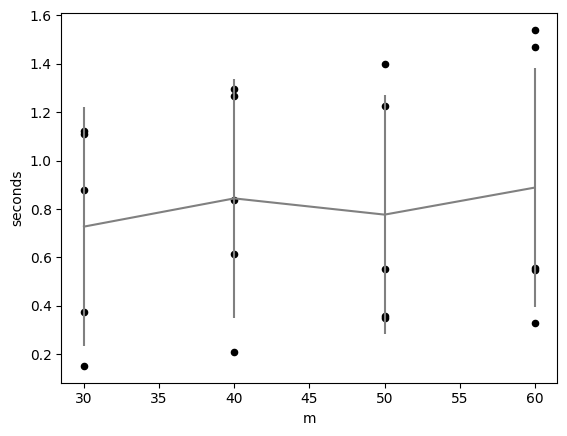

In [33]:
np.random.seed(1)
settings = {'s': 0.005, 'v0': 0.002, 'k': 1000, 'p0': 90_000,
            't': 290, 't0': 340}
results = []
n_simulation = 5
for m in [30, 40, 50, 60]:
  simulator = mistat.PistonSimulator(m=m, n_simulation=n_simulation,
                                     **settings)
  sim_result = simulator.simulate()
  results.extend([m, s] for s in sim_result['seconds'])
results = pd.DataFrame(results, columns=['m', 'seconds'])

group_std = results.groupby('m').std()
pooled_std = np.sqrt(np.sum(group_std**2) / len(group_std))[0]
print('Pooled standard deviation', pooled_std)

group_mean = results.groupby('m').mean()
ax = results.plot.scatter(x='m', y='seconds', color='black')
ax.errorbar(group_mean.index, results.groupby('m').mean().values.flatten(),
            yerr=[pooled_std] * 4, color='grey')
plt.show()

In [34]:
model = smf.ols(formula='seconds ~ C(m)', data=results).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(m),3.0,0.076379,0.025460,0.103972,0.956549
Residual,16.0,3.917929,0.244871,NaN,NaN


# Exercise 28

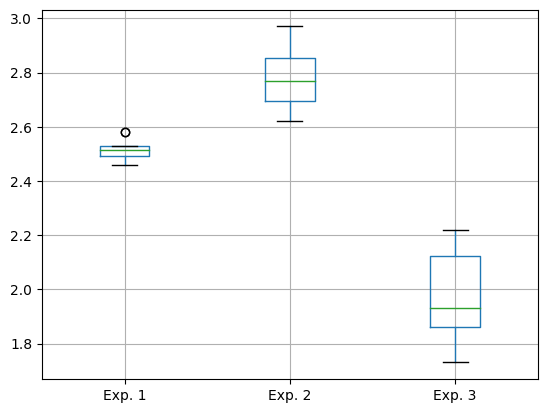

In [35]:
df = pd.DataFrame([
  [2.58, 2.62, 2.22],
  [2.48, 2.77, 1.73],
  [2.52, 2.69, 2.00],
  [2.50, 2.80, 1.86],
  [2.53, 2.87, 2.04],
  [2.46, 2.67, 2.15],
  [2.52, 2.71, 2.18],
  [2.49, 2.77, 1.86],
  [2.58, 2.87, 1.84],
  [2.51, 2.97, 1.86]
], columns=['Exp. 1', 'Exp. 2', 'Exp. 3'])
df.boxplot()

# Convert data frame to long format using melt
df = df.melt(var_name='Experiment', value_name='mu')

In [36]:
model = smf.ols(formula='mu ~ C(Experiment)', data=df).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Experiment),2.0,3.336327,1.668163,120.917098,3.352509e-14
Residual,27.0,0.372490,0.013796,NaN,NaN


In [37]:
experiment = df['Experiment']
mu = df['mu']
def onewayTest(x, verbose=False):
    df = pd.DataFrame({
        'value': x,
        'variable': experiment,
    })
    aov = pg.anova(dv='value', between='variable', data=df)
    return aov['F'].values[0]

B = pg.compute_bootci(mu, func=onewayTest, n_boot=1000,
    seed=1, return_dist=True)

Bt0 = onewayTest(mu)
print('Bt0', Bt0)
print('ratio', sum(B[1] >= Bt0)/len(B[1]))

Bt0 120.91709844559576
ratio 0.0


# Exercise 29

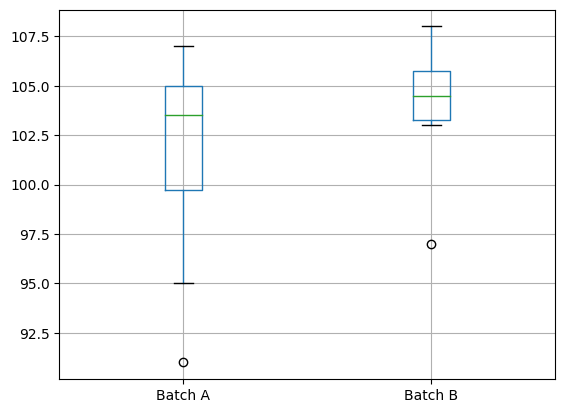

In [38]:
df = pd.DataFrame({
  'Batch A': [103, 107, 104, 102, 95, 91, 107, 99, 105, 105],
  'Batch B': [104, 103, 106, 103, 107, 108, 104, 105, 105, 97],
})
df.boxplot()
plt.show()

In [39]:
dist = mistat.randomizationTest(df['Batch A'], df['Batch B'], np.mean,
                                aggregate_stats=lambda x: x[0] - x[1],
                                n_boot=10000, seed=1)
# ax = sns.distplot(dist)
# ax.axvline(np.mean(df['Batch A']) - np.mean(df['Batch B']))

Original stat is -2.400000
Original stat is at quantile 1062 of 10001 (10.62%)
Distribution of bootstrap samples:
 min: -5.40, median: 0.00,  max: 5.60


In [40]:
# Convert data frame to long format using melt
df = df.melt(var_name='Batch', value_name='film_speed')

model = smf.ols(formula='film_speed ~ C(Batch)', data=df).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Batch),1.0,28.8,28.800000,1.555822,0.228263
Residual,18.0,333.2,18.511111,NaN,NaN


# Exercise 30

In [41]:
df = pd.DataFrame([
  [2.58, 2.62, 2.22],
  [2.48, 2.77, 1.73],
  [2.52, 2.69, 2.00],
  [2.50, 2.80, 1.86],
  [2.53, 2.87, 2.04],
  [2.46, 2.67, 2.15],
  [2.52, 2.71, 2.18],
  [2.49, 2.77, 1.86],
  [2.58, 2.87, 1.84],
  [2.51, 2.97, 1.86]
], columns=['Exp. 1', 'Exp. 2', 'Exp. 3'])

# Convert data frame to long format using melt
df = df.melt(var_name='Experiment', value_name='mu')

In [42]:
def func_stats(x):
    m = pd.Series(x).groupby(df['Experiment']).agg(['mean', 'count'])
    top = np.sum(m['count'] * m['mean'] ** 2) - len(x)*np.mean(x)**2
    return top / np.std(x) ** 2

Bt = []
mu = list(df['mu'])
for _ in range(1000):
    mu_star = random.sample(mu, len(mu))
    Bt.append(func_stats(mu_star))

Bt0 = func_stats(mu)
print('Bt0', Bt0)
print('ratio', sum(Bt >= Bt0)/len(Bt))

Bt0 26.986990459670288
ratio 0.0


# Exercise 31

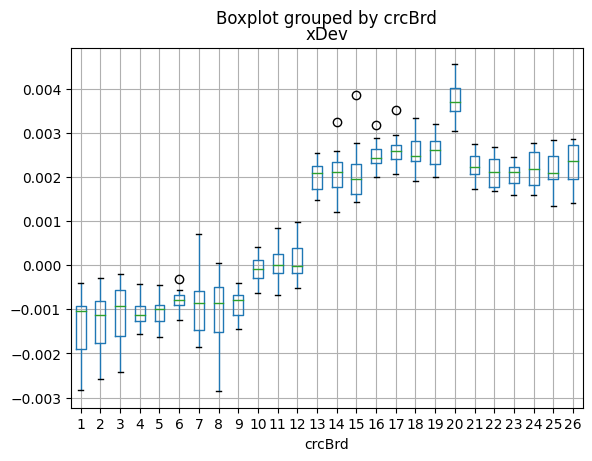

In [43]:
place = mistat.load_data('PLACE')
place.boxplot('xDev', by='crcBrd')
plt.show()

In [44]:
model = smf.ols(formula='xDev ~ C(crcBrd)', data=place).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(crcBrd),25.0,0.001128,4.512471e-05,203.292511,2.009252e-206
Residual,390.0,0.000087,2.219694e-07,NaN,NaN


In [45]:
G1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
G2 = [10, 11, 12]
G3 = [13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26]
G4 = [20]
place['group'] = 'G1'
place.loc[place['crcBrd'].isin(G2), 'group'] = 'G2'
place.loc[place['crcBrd'].isin(G3), 'group'] = 'G3'
place.loc[place['crcBrd'].isin(G4), 'group'] = 'G4'

statistics = place['xDev'].groupby(place['group']).agg(['mean', 'sem', 'count'])
statistics = statistics.sort_values(['mean'], ascending=False)
print(statistics.round(8))
statistics['Diff'] = 0
n = len(statistics)
print(statistics['mean'][:-1].values - statistics['mean'][1:].values)
print(statistics['mean'][:(n-1)].values - statistics['mean'][1:].values)
statistics.loc[1:, 'Diff'] = (statistics['mean'][:-1].values -
                              statistics['mean'][1:].values)
statistics['CR'] = 6.193 * statistics['Diff']
print(statistics.round(8))
# 0.001510 0.0022614 0.0010683
# 0.000757 0.000467 0.000486

sem = statistics['sem'].values
sem = sem**2
sem = np.sqrt(sem[:-1] + sem[1:])
print(sem * 6.193)
print(757/644, 467/387, 486/459)

           mean       sem  count
group                           
G4     0.003778  0.000100     16
G3     0.002268  0.000030    208
G2     0.000006  0.000055     48
G1    -0.001062  0.000050    144
[0.00151029 0.00226138 0.00106826]
[0.00151029 0.00226138 0.00106826]
           mean       sem  count      Diff        CR
group                                               
G4     0.003778  0.000100     16  0.000000  0.000000
G3     0.002268  0.000030    208  0.001510  0.009353
G2     0.000006  0.000055     48  0.002261  0.014005
G1    -0.001062  0.000050    144  0.001068  0.006616
[0.00064435 0.00038718 0.00045929]
1.1754658385093169 1.20671834625323 1.0588235294117647


In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog=place['xDev'], groups=place['group'],
                           alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    G1     G2   0.0011 0.001 0.0009 0.0013   True
    G1     G3   0.0033 0.001 0.0032 0.0035   True
    G1     G4   0.0048 0.001 0.0045 0.0052   True
    G2     G3   0.0023 0.001 0.0021 0.0025   True
    G2     G4   0.0038 0.001 0.0034 0.0041   True
    G3     G4   0.0015 0.001 0.0012 0.0018   True
-------------------------------------------------


# Exercise 32

In [47]:
df = pd.DataFrame({
    'US': [33, 25],
    'Europe': [7, 7],
    'Asia': [26, 11],
  })

print(df)

col_sums = df.sum(axis=0)
row_sums = df.sum(axis=1)
total = df.to_numpy().sum()

expected_frequencies = np.outer(row_sums, col_sums) / total

chi2 = (df - expected_frequencies) ** 2 / expected_frequencies
chi2 = chi2.to_numpy().sum()
print(f'chi2: {chi2:.3f}')
print(f'p-value: {1 - stats.chi2.cdf(chi2, 2):.3f}')

   US  Europe  Asia
0  33       7    26
1  25       7    11
chi2: 2.440
p-value: 0.295


In [48]:
chi2 = stats.chi2_contingency(df)
print(f'chi2-statistic: {chi2[0]:.3f}')
print(f'p-value: {chi2[1]:.3f}')
print(f'd.f.: {chi2[2]}')

chi2-statistic: 2.440
p-value: 0.295
d.f.: 2


# Exercise 33

In [49]:
car = mistat.load_data('CAR')
binned_car = pd.DataFrame({
  'turn': pd.cut(car['turn'], bins=[27, 30.6, 34.2, 37.8, 45]), #np.arange(27, 50, 3.6)),
  'mpg': pd.cut(car['mpg'], bins=[12, 18, 24, 100]),
})
freqDist = pd.crosstab(binned_car['mpg'], binned_car['turn'])
print(freqDist)

chi2 = stats.chi2_contingency(freqDist)
print(f'chi2-statistic: {chi2[0]:.3f}')
print(f'p-value: {chi2[1]:.3f}')
print(f'd.f.: {chi2[2]}')

turn       (27.0, 30.6]  (30.6, 34.2]  (34.2, 37.8]  (37.8, 45.0]
mpg                                                              
(12, 18]              2             4            10            15
(18, 24]              0            12            26            15
(24, 100]             4            15             6             0
chi2-statistic: 34.990
p-value: 0.000
d.f.: 6


# Exercise 34

In [50]:
question_13 = pd.DataFrame({
  '1': [0,0,0,1,0],
  '2': [1,0,2,0,0],
  '3': [1,2,6,5,1],
  '4': [2,1,10,23,13],
  '5': [0,1,1,15,100],
  }, index = ['1', '2', '3', '4', '5']).transpose()
question_23 = pd.DataFrame({
  '1': [1,0,0,3,1],
  '2': [2,0,1,0,0],
  '3': [0,4,2,3,0],
  '4': [1,1,10,7,5],
  '5': [0,0,1,30,134],
  }, index = ['1', '2', '3', '4', '5']).transpose()

chi2_13 = stats.chi2_contingency(question_13)
chi2_23 = stats.chi2_contingency(question_23)

msc_13 = chi2_13[0] / question_13.to_numpy().sum()
tschuprov_13 = np.sqrt(msc_13 / (2 * 2)) # (4 * 4))
cramer_13 = np.sqrt(msc_13 / 2) # min(4, 4))

msc_23 = chi2_23[0] / question_23.to_numpy().sum()
tschuprov_23 = np.sqrt(msc_23 / 4) # (4 * 4))
cramer_23 = np.sqrt(msc_23 / 2) # min(4, 4))

print('Question 1 vs 3')
print(f'  Mean squared contingency : {msc_13:.3f}')
print(f'  Tschuprov : {tschuprov_13:.3f}')
print(f"  Cramer's index : {cramer_13:.3f}")
print('Question 2 vs 3')
print(f'  Mean squared contingency : {msc_23:.3f}')
print(f'  Tschuprov : {tschuprov_23:.3f}')
print(f"  Cramer's index : {cramer_23:.3f}")

Question 1 vs 3
  Mean squared contingency : 0.629
  Tschuprov : 0.397
  Cramer's index : 0.561
Question 2 vs 3
  Mean squared contingency : 1.137
  Tschuprov : 0.533
  Cramer's index : 0.754
